In [297]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install sklearn


You should consider upgrading via the 'c:\users\jinda\pycharmprojects\practice\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [300]:
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [301]:
df_car = pd.read_csv("data/car_data.csv")
df_car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [201]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [184]:
df_car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [202]:
#print(df_car.describe())
print(df_car.Owner.unique())
print(df_car.Car_Name.value_counts())
print(df_car.Fuel_Type.unique())
print(df_car.Transmission.unique())

[0 1 3]
city                 26
corolla altis        16
verna                14
fortuner             11
brio                 10
                     ..
Bajaj Dominar 400     1
omni                  1
Bajaj  ct 100         1
camry                 1
Honda Activa 125      1
Name: Car_Name, Length: 98, dtype: int64
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']


In [241]:

df_car['current_year'] = 2021
df_car['no_of_year'] = df_car['current_year'] - df_car['Year']
df_car.drop(['Year'],axis=1,inplace=True)

In [242]:

df_car.drop(['current_year'],axis=1,inplace=True)
df_car.head(5)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_year
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [243]:
fuel_type = pd.get_dummies(df_car[['Fuel_Type']],drop_first=True)
seller_type=pd.get_dummies(df_car[['Seller_Type']],drop_first=True)
transmission = pd.get_dummies(df_car[['Transmission']],drop_first=True)


In [244]:
final_df = pd.concat([df_car,fuel_type,seller_type,transmission],axis=1)

In [245]:
final_df.drop(['Fuel_Type','Seller_Type','Transmission'],axis=1,inplace=True)
final_df.head(5)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,3.35,5.59,27000,0,7,0,1,0,1
1,sx4,4.75,9.54,43000,0,8,1,0,0,1
2,ciaz,7.25,9.85,6900,0,4,0,1,0,1
3,wagon r,2.85,4.15,5200,0,10,0,1,0,1
4,swift,4.60,6.87,42450,0,7,1,0,0,1


In [246]:

X = final_df.drop(['Selling_Price','Car_Name'],axis=1)
y=final_df[['Selling_Price']]


In [247]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


     Present_Price  Kms_Driven  Owner  no_of_year  Fuel_Type_Diesel  \
0             5.59       27000      0           7                 0   
1             9.54       43000      0           8                 1   
2             9.85        6900      0           4                 0   
3             4.15        5200      0          10                 0   
4             6.87       42450      0           7                 1   
..             ...         ...    ...         ...               ...   
296          11.60       33988      0           5                 1   
297           5.90       60000      0           6                 0   
298          11.00       87934      0          12                 0   
299          12.50        9000      0           4                 1   
300           5.90        5464      0           5                 0   

     Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0                   1                       0                    1  
1        

In [211]:
#Feature selection using lasso method

#model=SelectFromModel(Lasso(alpha=0.005,random_state=0))
#model.fit(X_train,y_train)
#model.get_support()
#selected_features = X_train.columns[(model.get_support())]

#selected_features

In [255]:
# feature selection using selectkbest method
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
best_features = SelectKBest(score_func=f_classif , k = 5)
best_features.fit(X_train,y_train)

c:\users\jinda\pycharmprojects\practice\venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SelectKBest(k=5)

In [273]:
import numpy as np
best_features.scores_
arr = np.array(best_features.scores_)
print(arr)
features_df = pd.DataFrame(arr,index=X_train.columns,columns=['feature_score'])
features_df

[13.2213502   6.03341253  0.92022454  1.5079217   2.6472434   2.37674767
 13.24420956  1.48481588]


,feature_score
Present_Price,13.221350
Kms_Driven,6.033413
Owner,0.920225
no_of_year,1.507922
Fuel_Type_Diesel,2.647243
Fuel_Type_Petrol,2.376748
Seller_Type_Individual,13.244210
Transmission_Manual,1.484816


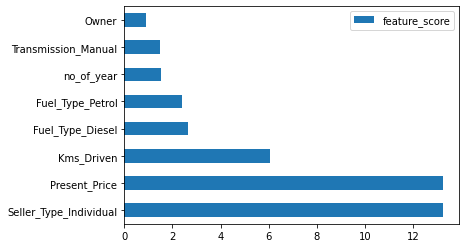

In [280]:
features_df.nlargest(8,'feature_score').plot(kind='barh')
plt.show()



In [ ]:
# heatmap

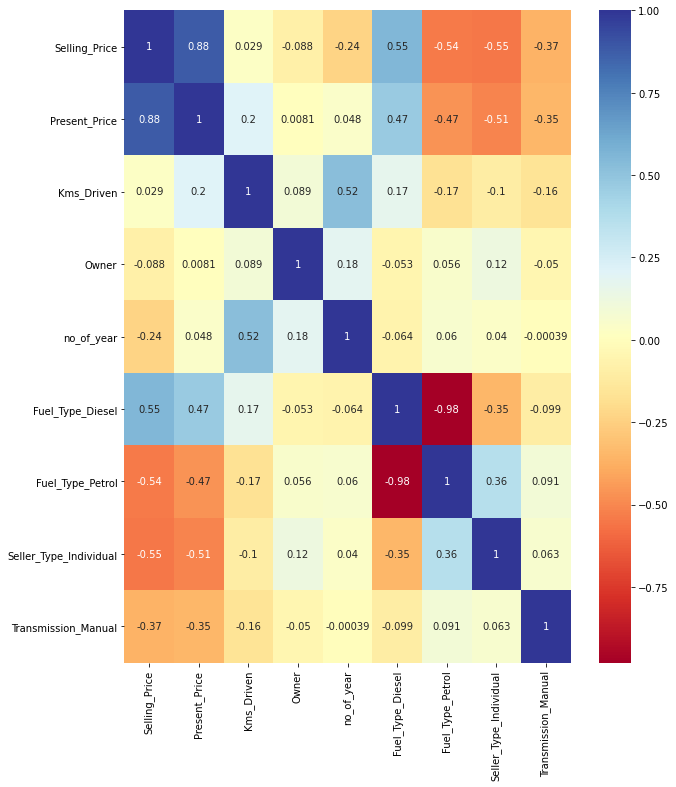

In [289]:

cormat = final_df.corr()

top_features = cormat.index
plt.figure(figsize=(10,12))
g = sns.heatmap(cormat,annot=True,cmap='RdYlBu')

In [326]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=40)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
y_pred

<ipython-input-326-8be7b4b1c25e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


array([ 6.7075 ,  0.4675 ,  4.57625,  8.88875, 15.16375,  5.19125,
        3.07   ,  0.4435 ,  3.915  ,  4.65375,  2.7275 ,  0.77275,
        4.78375,  7.22125,  7.695  , 14.57575,  6.8275 ,  3.97375,
        0.4525 ,  1.595  ,  3.17   ,  4.85125,  5.155  ,  9.55975,
        0.20025,  0.68675,  0.30825,  0.79375,  0.47875,  4.10725,
        2.64575,  5.995  ,  0.483  ,  7.29875,  3.19125,  1.16625,
        5.62375,  5.285  ,  0.2825 ,  8.2    ,  7.8805 , 21.5    ,
        4.87625,  4.31   ,  5.80375, 11.59225,  0.2275 ,  0.8065 ,
        5.34375,  6.89   ,  6.15275,  3.06125,  5.2325 , 23.30625,
        1.18475,  1.12925,  0.5205 ,  2.45875,  3.57375,  2.48625,
        3.68525])

In [327]:
rf.score(X_test,y_test)

0.9605984267641585

In [328]:
#import sklearn
#print(sklearn.__version__)
from sklearn.metrics import mean_squared_error, r2_score 
print('mean squared error',mean_squared_error(y_pred,y_test))
print('r2 score',r2_score(y_pred,y_test))


mean squared error 0.9959661188524591
r2 score 0.953816007831107
